In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

In [2]:
data = pd.read_csv('datasetproject.csv')

In [3]:
data.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [4]:
data.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [5]:
data.isna()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
9695,False,False,False,False,False,False,False,False,False,False,False
9696,False,False,False,False,False,False,False,False,False,False,False
9697,False,False,False,False,False,False,False,False,False,False,False
9698,False,False,False,False,False,False,False,False,False,False,False


## Pergunta de Negócio 1

Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [6]:
# Criando novo dataset apenas com a categoria "Office Supplies"
data_cat = data[data['Categoria'] == 'Office Supplies']

In [7]:
# Criando novo dataset para concatenar e agrupar os valores de venda por cidade
data_sales_cat = data_cat.groupby(['Cidade'])['Valor_Venda'].sum()

In [8]:
# Então encontramos a cidade com maior valor de venda
cidade_maior_venda = data_sales_cat.idxmax()
print(f"Cidade com maior valor de venda para 'Office Supplies': {cidade_maior_venda}")

Cidade com maior valor de venda para 'Office Supplies': New York City


In [9]:
# Para conferir
data_sales_cat.sort_values(ascending = False)

Cidade
New York City    68362.814
Los Angeles      47098.100
San Francisco    41771.198
Seattle          34856.878
Philadelphia     29313.687
                   ...    
Ormond Beach         2.808
Pensacola            2.214
Jupiter              2.064
Elyria               1.824
Abilene              1.392
Name: Valor_Venda, Length: 480, dtype: float64

## Pergunta de Negócio 2:

Qual o Total de Vendas Por Data do Pedido?
Demonstre o resultado através de um gráfico de barras.

In [13]:
data_sales_period = data.groupby('Data_Pedido')['Valor_Venda'].sum()

In [14]:
data_sales_period.head()

Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
Name: Valor_Venda, dtype: float64

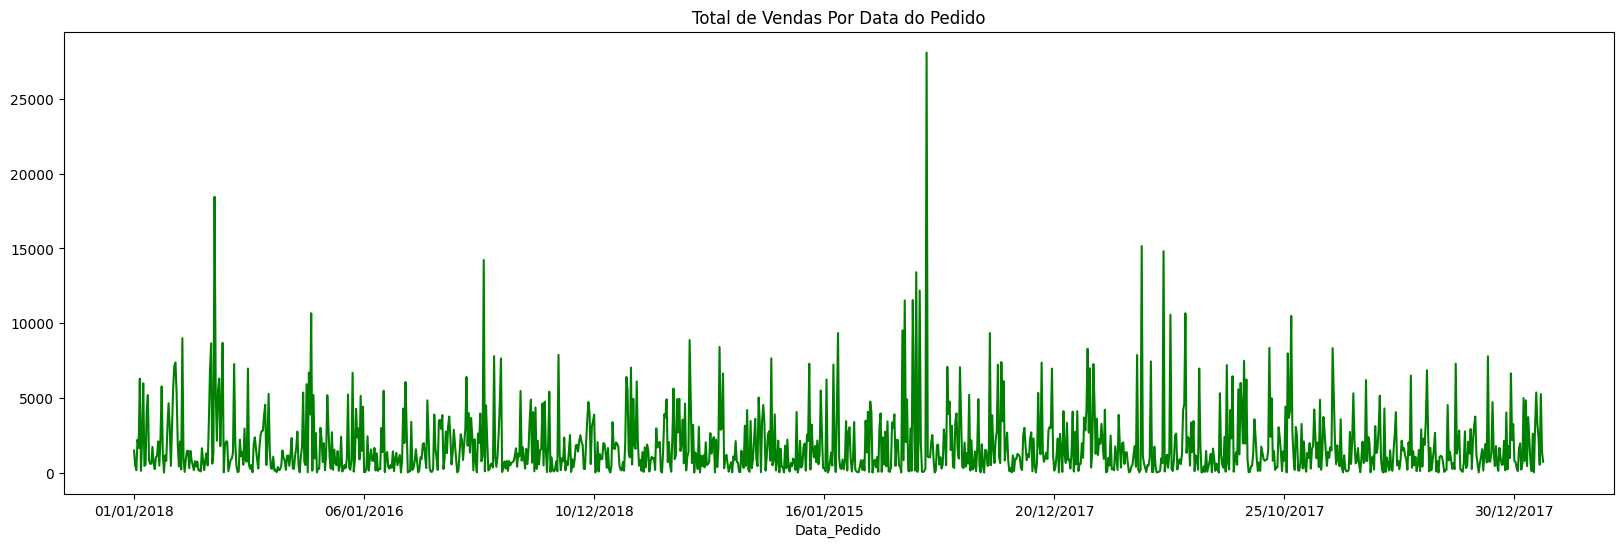

In [20]:
# Plot
plt.figure(figsize = (20, 6))
data_sales_period.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'green')
plt.title('Total de Vendas Por Data do Pedido')
plt.show()

## Pergunta de Negócio 3:

Qual o Total de Vendas por Estado?
Demonstre o resultado através de um gráfico de barras.

In [24]:
data_sales_state = data.groupby('Estado')['Valor_Venda'].sum().reset_index()

In [28]:
data_sales_state.head()

,Estado,Valor_Venda
0,Alabama,19510.6400
1,Arizona,35272.6570
2,Arkansas,11673.8300
3,California,442927.0975
4,Colorado,31841.5980


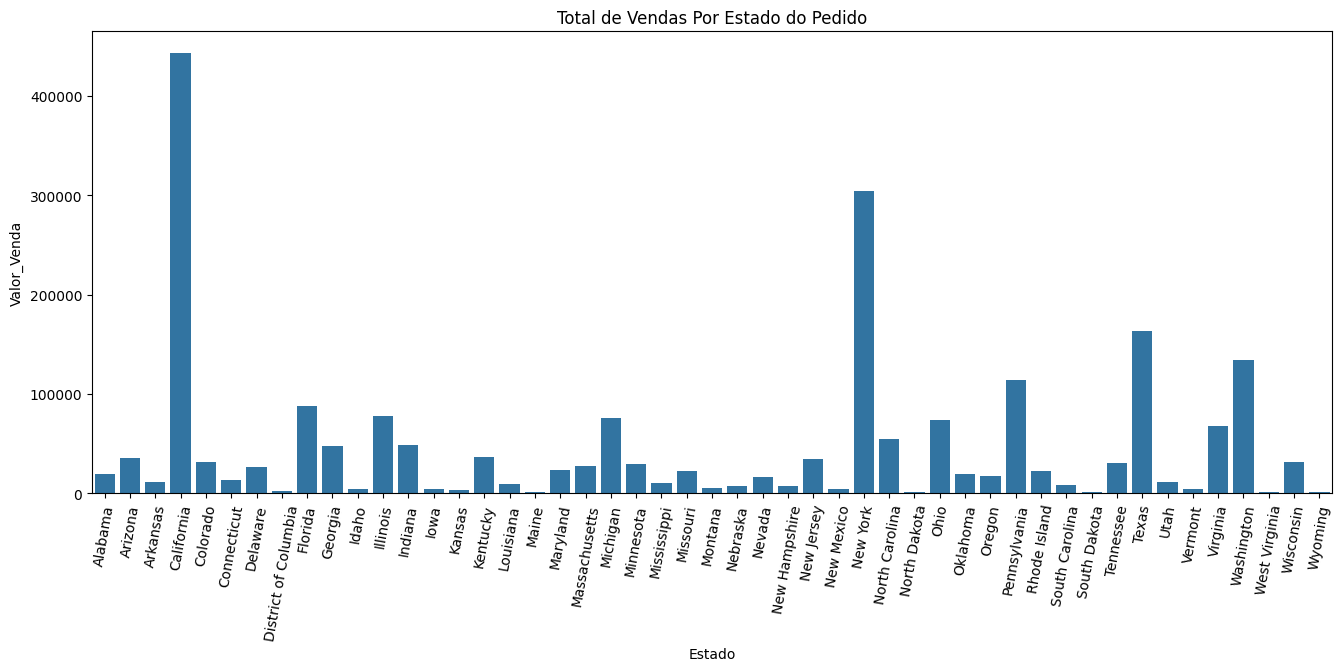

In [27]:
plt.figure(figsize = (16, 6))
sea.barplot(data = data_sales_state,
            y = 'Valor_Venda',
            x = 'Estado').set(title ='Total de Vendas Por Estado do Pedido')
plt.xticks(rotation = 80)
plt.show()

## Pergunta de Negócio 4:

Quais São as 10 Cidades com Maior Total de Vendas?
Demonstre o resultado através de um gráfico de barras.